# Homework 4: Iteration and Randomness. 
## Due `Monday Apr. 27th`, 11:59pm

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [3]:
# Don't change this cell; just run it. 
import numpy as np
import babypandas as bpd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw.ok')
_ = ok.auth(inline=True)

Assignment: Homework 4: Iteration, Randomness
OK, version v1.14.19

Successfully logged in as k3huang@ucsd.edu


In [4]:
import numpy as np
import babypandas as bpd

**Important**: The `ok` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Once you're finished, you must do two things:

### Turn into OK
Select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [5]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not automatically save 'hw.ipynb'
Make sure your notebook is correctly named and saved before submitting to OK!
Making a best attempt to submit latest 'hw.ipynb', last modified at Wed Apr 22 12:12:20 2020
Submit... 100% complete
Submission successful for user: k3huang@ucsd.edu
URL: https://okpy.org/ucsd/dsc10/sp20/hw04/submissions/LvPJBv



## 0. Mid-quarter survey

We are collecting mid-quarter feedback! Please consider filling out this [Google Form](https://forms.gle/JAMhjWFLJ69a7Uyh8). Your responses are totally anonymous (and this question isn't graded...)

## 1. Jupyter Notebook Cells

Suppose you found a super long Jupyter notebook file with 1000 cells. Some of the cells are Code cells, and the others are Markdown cells. The file `cells.csv` contains 1000 rows, with each roll representing the type of a cell in the Jupyter notebook. Read `cells.csv` into a table called `cell_table`.

In [6]:
cell_table = bpd.read_csv("cells.csv")
cell_table

,Cell Type
0,Code
1,Code
2,Code
3,Code
4,Code
...,...
995,Code
996,Markdown
997,Markdown
998,Code


**Question 1.1.** You're interested in the proportion of Mark down cells in the file. Calculate the true proportion of Mark down cells and store it in the variable `markdown_true_prop`.

In [7]:
#...markdown_true_prop
markdown_true_prop = cell_table[cell_table.get('Cell Type') == 'Markdown'].shape[0] / cell_table.shape[0]
markdown_true_prop

0.345

In [8]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2.** If you are only able to randomly sample 150 different cells. Which of the following would create a representative sample of the cells in the file? Assign 1, 2, or 3 to `q1_2`.

1. `cell_table.take(np.arange(150))`
2. `cell_table.sample(150, replace=False)`
3. `cell_table[cell_table.get('Cell Type') == 'Markdown']`

In [9]:
#...q1_2
q1_2 = 2

In [10]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.3.** You decide to pick 150 different cells using the sampling method you chose in question 2 above. Write a function called `pick_150_cells` that simulates this. Specifically, the function should take no arguments and should return a table of the types of 150 cells.

In [11]:
def pick_150_cells():
    ...

In [12]:
#DELETE
def pick_150_cells():
    return cell_table.sample(150, replace=False)

In [13]:
pick_150_cells()

,Cell Type
957,Markdown
202,Markdown
706,Code
627,Code
6,Code
...,...
120,Code
905,Code
717,Code
2,Code


In [14]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.4.** You are interested in knowing the true proportion of Markdown cells of all the cells in the file, but suppose you can only look through 150 cells at a time. Hence, you simulate this experiment in 500 trials. For each trial, you decide to calculate the proportion of Markdown cells. Simulate the experiment and store the *array* of proportions in the variable `markdown_empirical_props`.

*Note*: your proportions should be decimals between 0 and 1.

In [16]:
#...markdown_empirical_props

markdown_empirical_props = np.array([])
for i in range(500):  
    proportion_markdown = (pick_150_cells().get('Cell Type') == 'Markdown').mean()
    markdown_empirical_props = np.append(markdown_empirical_props, proportion_markdown)

markdown_empirical_props.mean()

0.34624

In [17]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.5.** Now, compute the average of `markdown_empirical_props`. You claim that this average is a good estimate of the proportion of Markdown cells. Store your average in `markdown_claim_prop`.

In [18]:
#...markdown_claim_prop
markdown_claim_prop = markdown_empirical_props.mean()
markdown_claim_prop

0.34624

In [19]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.6.**  How far away is your claim from the true proportion of Markdown cells? Compute the absolute difference between the two and store it in the variable `error`. Remember that you calculated the true proportion of Markdown cells in Question 1.

In [20]:
#...error
error = abs(markdown_claim_prop - markdown_true_prop)
error

0.0012400000000000189

In [21]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.7.** When you ran your simulation 500 times, you got 500 different estimates for the number of Markdown cells. Plot the distribution of these estimates as a histogram.

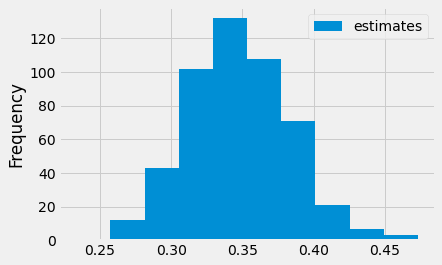

In [22]:
#- your code here
bpd.DataFrame().assign(estimates=markdown_empirical_props).plot(kind='hist')

## 2.  Powerball

You go to the nearest supermarket (or the gas station if you prefer) and buy a Powerball lottery ticket. 

You pick five different numbers, one at a time, from 1 to 69. Then you separately pick a number from 1 to 26. These are your numbers, for example (59, 12, 55, 20,  3, 25). 

The winning numbers are chosen by somebody drawing five balls, one at a time, from a collection of white balls numbered 1 to 69. Then they draw a red ball (the powerball) from a collection of red balls numbered 1 to 26. 

We’ll assume for this problem that in order to win the biggest prize (the jackpot), *all* your numbers need to match the winning numbers and be in the exact same order. However, you can still win some money if you have *some* numbers that match the winning numbers and appear in the same position as the corresponding winning number.

**Question 2.1.** What is the probability that you win the jackpot? Calculate your answer by hand and assign it to `jackpot_chance`. It should be a decimal number between 0 and 1.

**Hint**: *Since you are choosing five different numbers for the white balls, the denominator should be decreasing. The probability of getting the first number correct is 1/69, the second is 1/68, and so on...*

In [23]:
#...jackpot_chance
jackpot_chance = (1/69) * (1/68) * (1/67) * (1/66) * (1/65) * (1/26)
jackpot_chance

2.85191484418642e-11

In [24]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.2.** Your chance of winning the jackpot is quite low, but you can still win some money if you have at least one number correct, in the same position as the winning number. What is the probability that you get at least one number correct and win some money? Assign your answer to `non_losing_prob`. 

In [25]:
#...non_losing_prob
non_losing_prob = 1 - (68/69) * (67/68) * (66/67) * (65/66) * (64/65) * (25/26)
non_losing_prob

0.10813823857302107

In [26]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.3.** Write a function called `simulate_one_ticket`. It should take **no arguments**, and it should return **an array** with 6 random numbers. The first five numbers should all be randomly chosen (without replacement) from between 1 and 69. The last number should be between 1 and 26.

In [27]:
def simulate_one_ticket():
    ...

In [28]:
#DELETE

def simulate_one_ticket():
    """Simulate one ticket that you buy."""
    white_balls = np.random.choice(np.arange(1, 70), size=5, replace=False)
    red_ball = np.random.choice(np.arange(1, 27))
    balls = np.append(white_balls, red_ball)
    return balls

In [31]:
simulate_one_ticket() # a sample function call

array([ 2, 20, 56, 54, 65,  6])

In [32]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.4.** It's draw day, and you checked the lucky numbers posted, which happened to be (29, 40, 46, 63, 58, 2). Suppose you didn't win the jackpot, and you are a bit depressed. You want to remind yourself how unlikely it is to win a jackpot. Call the function `simulate_one_ticket` 100,000 times (this would cost at least $200,000 if you were to buy that many!). How many times did you win the jackpot? Assign your answer to `count_jackpot`.

*Hint:* Try it first with only buying 10 tickets. Once you are sure you have that figured out, change it to 100,000 tickets. It will take a little while (about a minute) for Python to perform the calculations when you are buying 100,000 tickets.

*Hint 2:* You'll have to count how many of the numbers you chose match the numbers that were drawn. One way to do this involves `np.count_nonzero`.

In [35]:
#...count_jackpot
count_jackpot = 0
for _ in range(100000):
    if np.count_nonzero(simulate_one_ticket() == [29, 40, 46, 63, 58, 2]) == 6:
        count_jackpot += 1
count_jackpot

0

In [36]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Yahtzee 

In the dice game Yahtzee, players roll and reroll dice, trying to meet certain objectives. A player rolls five dice on the first roll, and after looking at the results, *can choose to* reroll any number of them on the second roll. Similarly, after looking at the results of the second roll, the player can choose to reroll any number of those for the third roll. After the third roll, no more rolling is allowed.

One objective in Yahtzee is to roll as many 6's as possible. The standard strategy is as follows:
* Roll all five dice.
* Keep any that are 6's. Reroll all other dice.
* Keep any that are 6's. Reroll all other dice.
The number of 6's at the end of this process determines the player's score. 

Throughout this problem, we’ll represent the results of a Yahtzee roll as an array of five values, each between 1 and 6. For example, we might originally roll (3, 6, 1, 1, 2). Then we’d reroll all but the second die, and the results after our first reroll might be (6, 6, 5, 2, 6). Then we’d reroll one more time and the results might be (6, 6, 4, 1, 6), which means we’d have a score of 3.

**Question 3.1.** Create an array called `my_dice` that contains the results of a first Yahtzee roll (that is, five random numbers between 1 and 6).

In [37]:
#...my_dice
my_dice = np.random.choice(np.arange(1,7), 5)
my_dice

array([4, 3, 5, 1, 2])

In [38]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.2.** Define a function called `reroll()` that takes one Yahtzee roll, `roll` as its input and returns the updated roll as its ouput. The function should not change the contents of the input `roll`, but, rather, should output a new array representing your dice after one reroll. Your function should implement the standard strategy for rolling 6's, that is, keep all dice that were a 6 and reroll all other dice.

*Hint:* Start out by creating a new array of five 0's. Then reset the *i*-th value by assigning a number to updated_dice[i].

*Hint:* You can test out your function by repeatedly rerolling. Since you are keeping all the 6's you ever roll, eventually you should get all 6's by repeatedly rerolling.

In [39]:
def reroll(roll):
    ...

In [40]:
#DELETE
def reroll(roll):
    updated_dice = np.array([0, 0, 0, 0, 0])
    for i in np.arange(5):
        if roll[i] != 6:
            updated_dice[i] = np.random.choice(np.arange(1,7), 1)
        else:
            updated_dice[i] = 6
    return updated_dice

In [44]:
reroll(np.array([2, 3, 6, 6, 1])) # a sample function call

array([5, 6, 6, 6, 3])

Now, practice taking a complete turn at Yahtzee, and see how many 6's you can get! Copy your answer from question 6.1 to roll new dice. Then use your `reroll()` function twice, and calculate the number of 6's you have at the end of your turn. Assign the number to `number_of_six`.

In [45]:
#DELETE
# Practice taking a turn here.

my_dice = np.random.choice(np.arange(1,7), 5) #replace this with your code from question 6.1
second_roll = reroll(my_dice)
third_roll = reroll(second_roll)
third_roll

array([3, 5, 6, 6, 6])

In [46]:
#DELETE
#calculate how many 6's you have
number_of_six = np.count_nonzero(third_roll==6)
number_of_six

3

In [47]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.3.** Now, use a for loop to help you take 20,000 turns at Yahtzee. On each turn, you should roll the dice, then reroll twice, implementing the strategy above. For each of the 20,000 turns, count the number of sixes you see after the third roll (your score) and record your score in an array called `score_array`. 

*Hint:* Try taking 10 turns with a `for` loop. Once you are sure you have that figured out, change it to 20,000 turns. It will take a little while (about a minute) for Python to perform the calculations when you are doing 20,000 turns.

In [48]:
#...score_array
score_array = np.array([])

for i in range(20000):
    my_dice = np.random.choice(np.arange(1,7), 5)
    second_roll = reroll(my_dice)
    third_roll = reroll(second_roll)
    score = np.count_nonzero(third_roll==6)
    score_array = np.append(score_array, score)

score_array

# A simulation of 200000 trials was 12.0067

array([1., 3., 2., ..., 1., 2., 2.])

In [49]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.4.** Use the data you have collected to approximate your average score using this strategy, and save your answer in `average_score.` 

Note: Your answer need not be an integer.

In [50]:
#...average_score
average_score = np.mean(score_array)
average_score

2.1119

In [51]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# Finish Line

Congratulations, you're done with the homework!  Be sure to

- **Verify that all tests pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Run the last cell to submit your work**

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir('tests') if q.startswith('q')]

In [ ]:
_ = ok.submit()